In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Pclass', 'Cabin'], inplace=True)
df.dropna(inplace = True)

<Axes: >

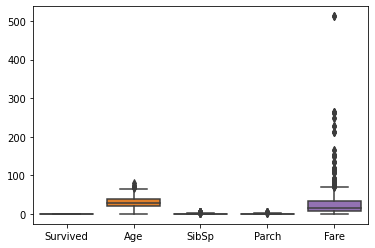

In [186]:
sns.boxplot(df)

In [187]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQS = Q3 - Q1

outliers = ((df[IQS.index] < Q1 - 1.5*IQS) | (df[IQS.index] > Q3 + 1.5*IQS)).any(axis=1)
df = df[~outliers]

<Axes: >

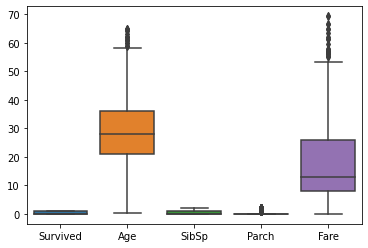

In [188]:
sns.boxplot(df)

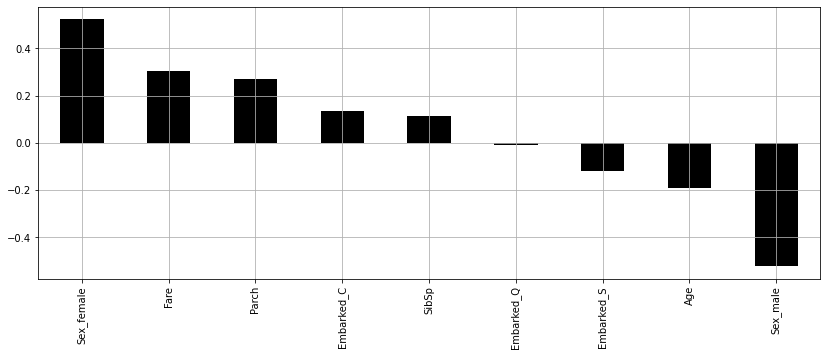

In [189]:
df_dummies = pd.get_dummies(df)
ax = df_dummies.corr()['Survived'].sort_values(ascending=False)[1:].plot.bar(figsize=(14, 5), cmap='copper')
ax.grid()

Text(0, 0.5, '# of Survived')

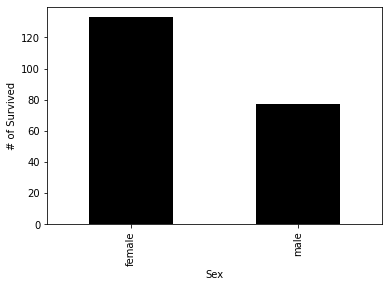

In [190]:
ax = df.groupby('Sex')['Survived'].sum().plot(kind='bar', cmap='copper')
ax.set_ylabel('# of Survived')

In [191]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df_dummies.drop(columns = 'Survived')
y = df_dummies['Survived']

features = X.columns.values
scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = features

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Logistic Regression

In [193]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
metrics.accuracy_score(y_test, prediction)

0.7699115044247787

<Axes: >

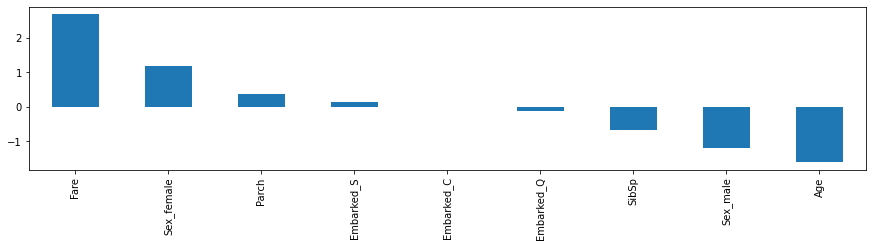

In [194]:
pd.Series(model.coef_[0], index=features).sort_values(ascending=False).plot.bar(figsize= (15, 3))

#### XGBoost

In [195]:
from xgboost import XGBClassifier

model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)

prediction = model_xg.predict(X_test)
metrics.accuracy_score(y_test, prediction)

0.7433628318584071

<Axes: >

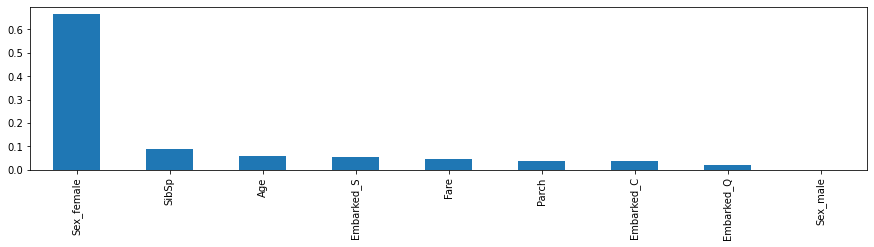

In [196]:
pd.Series(model_xg.feature_importances_, index=features).sort_values(ascending=False).plot.bar(figsize= (15, 3))

#### Random Forest

In [246]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(criterion='entropy', max_depth=8)
model_rf.fit(X_train, y_train)

prediction = model_rf.predict(X_test)
metrics.accuracy_score(y_test, prediction)

0.7787610619469026

<Axes: >

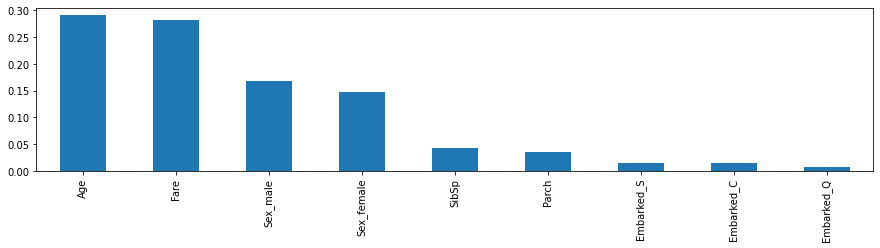

In [244]:
pd.Series(model_rf.feature_importances_, index=features).sort_values(ascending=False).plot.bar(figsize= (15, 3))

In [221]:
test = pd.read_csv("test.csv")
test_dummies = pd.get_dummies(test)

In [228]:
X_contest = test_dummies[features]
X_contest["Age"]= test_dummies[features]['Age'].fillna(test_dummies['Age'].mean())
X_contest["Fare"]= test_dummies[features]['Fare'].fillna(test_dummies['Fare'].mean())

y_contest = model_rf.predict(X_contest)

/tmp/ipykernel_60718/1673321373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_contest["Age"]= test_dummies[features]['Age'].fillna(test_dummies['Age'].mean())
/tmp/ipykernel_60718/1673321373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_contest["Fare"]= test_dummies[features]['Fare'].fillna(test_dummies['Fare'].mean())


In [229]:
prediction = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": y_contest
})

In [231]:
prediction.to_csv("submission.csv", index=False)

In [248]:
model_rf.score(X_test, y_test)

0.7787610619469026

In [4]:
model_xg.score(X_train, y_train)

NameError: name 'model_xg' is not defined

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
mean = 0.05
std = 0.04

def norm(X, mean, std):
    return np.exp(-0.5*((X-mean)/std)**2) / (std*np.sqrt(2*np.pi))

In [32]:
H = np.linspace(-0.7, 0.7, 100)
R = norm(x, mean, std)

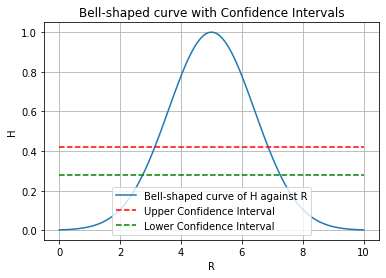

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for R and H (replace these with your actual data)
R = np.linspace(0, 10, 100)
H = np.exp(-(R - 5) ** 2 / 4)  # Replace this with your bell-shaped curve function

# Calculate the mean and standard deviation of H for each value of R
mean_H = np.mean(H)
std_H = np.std(H)

# Define the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the sample size (assuming you have sufficient data points for each R value)
sample_size = len(H)  # Replace this with the actual sample size

# Calculate the critical value for the confidence interval
critical_value = 1.96  # For a 95% confidence interval (Z-score for 95% CI)

# Calculate the confidence interval for each value of R
confidence_interval = critical_value * (std_H / np.sqrt(sample_size))

# Plot the bell-shaped curve of H against R
plt.plot(R, H, label='Bell-shaped curve of H against R')

# Plot the lines corresponding to the first confidence interval above and below the mean curve
upper_bound = mean_H + confidence_interval
lower_bound = mean_H - confidence_interval
plt.plot(R, mean_H + np.zeros_like(R) + confidence_interval, 'r--', label='Upper Confidence Interval')
plt.plot(R, mean_H + np.zeros_like(R) - confidence_interval, 'g--', label='Lower Confidence Interval')

plt.xlabel('R')
plt.ylabel('H')
plt.legend()
plt.title('Bell-shaped curve with Confidence Intervals')
plt.grid(True)
plt.show()

(array([ 4., 10.,  6., 24., 19., 19.,  4.,  9.,  3.,  2.]),
 array([-0.0254286 , -0.00760852,  0.01021156,  0.02803164,  0.04585172,
         0.06367181,  0.08149189,  0.09931197,  0.11713205,  0.13495213,
         0.15277221]),
 <BarContainer object of 10 artists>)

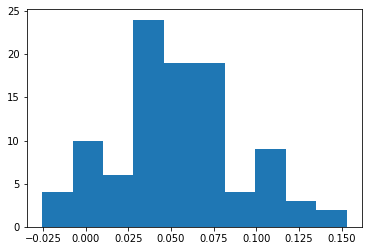

In [29]:
plt.hist(np.random.normal(0.05, 0.04, (100,)))